In [1]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv('/Users/juhimishra/Downloads/Micro Credit Project/Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [4]:
print("Total no of Rows:",df.shape[0])
print("Total no of columns:",df.shape[1])

Total no of Rows: 209593
Total no of columns: 37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
# Check the name of coloumns which contain string
df.select_dtypes(include='object').columns

Index(['msisdn', 'pcircle', 'pdate'], dtype='object')

In [7]:
# Check the name of rows which contain numerical value
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90'],
      dtype='object')

In [8]:
len(df.select_dtypes(include=['int64', 'float64']).columns)

34

In [9]:
df.isna().sum().to_frame('missing values')

missing values
Unnamed: 0                         0
label                              0
msisdn                             0
aon                                0
daily_decr30                       0
daily_decr90                       0
rental30                           0
rental90                           0
last_rech_date_ma                  0
last_rech_date_da                  0
last_rech_amt_ma                   0
cnt_ma_rech30                      0
fr_ma_rech30                       0
sumamnt_ma_rech30                  0
medianamnt_ma_rech30               0
medianmarechprebal30               0
cnt_ma_rech90                      0
fr_ma_rech90                       0
sumamnt_ma_rech90                  0
medianamnt_ma_rech90               0
medianmarechprebal90               0
cnt_da_rech30                      0
fr_da_rech30                       0
cnt_da_rech90                      0
fr_da_rech90                       0
cnt_loans30                        0
amnt_loans30                       0
maxamnt_loans30                    0
medianamnt_loans30                 0
cnt_loans90                        0
amnt_loans90                       0
maxamnt_loans90                    0
medianamnt_loans90                 0
payback30                          0
payback90                          0
pcircle                            0
pdate                              0

Seems no missing values using isna method in this dataset

In [10]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  \
count      209593.000000     209593.000000  209593.000000  209593.000000   
mean         3712.202921       2064.452797       3.978057    3737.355121   
std         53374.833430       2370.786034       4.256090   53643.625172   
min           -29.000000          0.000000       0.000000       0.000000   
25%             0.000000        770.000000       1.000000       0.000000   
50%             0.000000       1539.000000       3.000000       2.000000   
75%             0.000000       2309.000000       5.000000       6.000000   
max        999171.809410      55000.000000     203.000000  999606.368132   

       sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
count      209593.000000         209593.000000         209593.000000   
mean         7704.501157           1812.817952           3851.927942   
std         10139.621714           2070.864620          54006.374433   
min             0.000000              0.000000           -200.000000   
25%          1540.000000            770.000000             11.000000   
50%          4628.000000           1539.000000             33.900000   
75%         10010.000000           1924.000000             83.000000   
max        810096.000000          55000.000000         999479.419319   

       cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.00000  209593.000000      209593.000000         209593.000000   
mean         6.31543       7.716780       12396.218352           1864.595821   
std          7.19347      12.590251       16857.793882           2081.680664   
min          0.00000       0.000000           0.000000              0.000000   
25%          2.00000       0.000000        2317.000000            773.000000   
50%          4.00000       2.000000        7226.000000           1539.000000   
75%          8.00000       8.000000       16000.000000           1924.000000   
max        336.00000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.0

With the help of describe method we came across that there are no missing values in any of the continous columns. while seeing mean and std value
seems few skewness are there in dataset. Even quantile stats are also having huge difeerences from one quantile to he other which means there are chances 
of skewness. Will check using other techniques too.

In [11]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [12]:
df['label'].unique()

array([0, 1])

#### Checking missing values row wise using unique method 

In [13]:
null_data = df[df.isnull().any(axis=1)]

In [14]:
null_data

Empty DataFrame
Columns: [Unnamed: 0, label, msisdn, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, pcircle, pdate]
Index: []

No missing values present in any of the rows too

## EDA

<AxesSubplot:xlabel='label', ylabel='aon'>

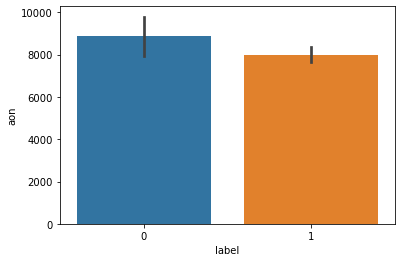

In [15]:
sns.barplot(x = 'label', y = 'aon', data = df)

number of days cellular network used by defaulter are more compare to non- defaulter.

<AxesSubplot:xlabel='label', ylabel='daily_decr30'>

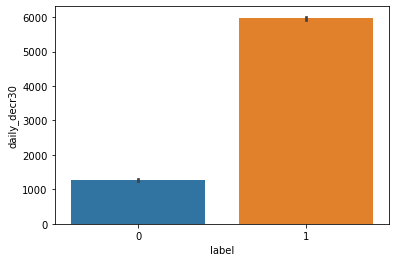

In [16]:
sns.barplot(x = 'label', y = 'daily_decr30', data = df)

Here we can see with the help of barplot that daily amount user for last 30 days are more non defaulter customer whic is a 
positive sign for a company. Loss are less as defaulter user are less in this category

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

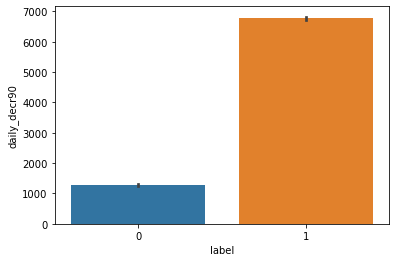

In [17]:
sns.barplot(x = 'label', y = 'daily_decr90', data = df)

as we seen above for 30 days users similarly for 90 days users too we are having good number of customers who re non defaulter 
compare to defaulter

In [18]:
df.groupby('label')['daily_decr30','daily_decr90'].mean()

daily_decr30  daily_decr90
label                            
0       1272.376756   1278.817736
1       5967.455497   6767.646423

Daily amount spent from main account are almost same for both 30 and 90 days which we can observe with the help of groupby
where got the information that non defaulter on an avarage is 1200 while defaulter on an average are between 6000 - 6700

<AxesSubplot:xlabel='label', ylabel='rental30'>

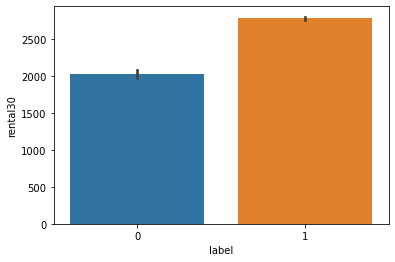

In [19]:
sns.barplot(x = 'label', y = 'rental30', data = df)

Avg balance over last 30 days are maintained by by non defaulter. As we can see in bar plot that number of non defaulter are more who maintains their avg balance over last 30 days.

<AxesSubplot:xlabel='label', ylabel='rental90'>

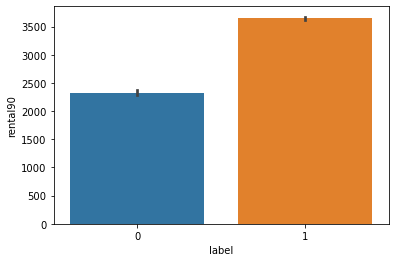

In [20]:
sns.barplot(x = 'label', y = 'rental90', data = df)

Rental 30 and rental 90 both the users are almost having same number of difference between defaulter and non defaulter

In [21]:
df.groupby('label')['rental30','rental90'].mean()

rental30     rental90
label                          
0      2029.914812  2329.486376
1      2787.095360  3647.985363

Here we can see on an average main account balance too for defaulter being given less compare to non defaulter. But the difference between two are 
not so immense

<AxesSubplot:xlabel='label', ylabel='last_rech_date_ma'>

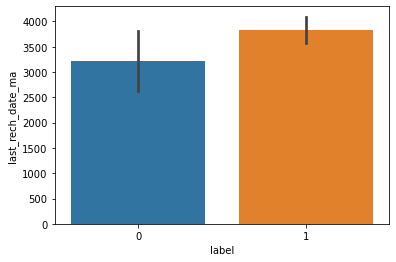

In [22]:
sns.barplot(x = 'label', y = 'last_rech_date_ma', data = df)

last reachrge date for main account we can see that both for defaulter and non defaulter are not having huge diffrence .
Main account generally being recharged for talktime and sms which is mandatory for everyone who uses phone. A telecom company here 
giving facility of 5 days loan where without payment in an emergency a customerf can recharge there account and pay the same withi stupilated period 
of time if failed such customer are considered to be defaulter. Here having the insight that even customers who are not paying on time are utilising
this service more or less equally to those who are paying on time .

<AxesSubplot:xlabel='label', ylabel='last_rech_date_da'>

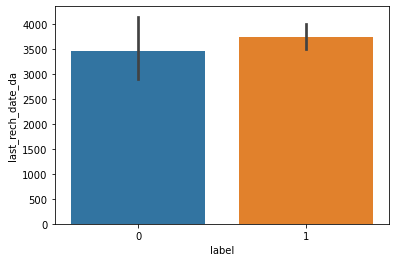

In [23]:
sns.barplot(x = 'label', y = 'last_rech_date_da', data = df)

As we analysed above for main account difference were less between defaulter and non defaulter similarly we can see here that almost 
difference are negligible between two for data recharge. last recharge we can see that almost both the users has recharged equally. and here we can cosnider that 
those who not paid t the company after using such service are loss for them . As these amount they need to recover from these customers.

In [24]:
df.groupby('label')['last_rech_date_ma','last_rech_date_da'].mean()

last_rech_date_ma  last_rech_date_da
label                                      
0            3223.694134        3470.381002
1            3831.746662        3746.692974

Here i am trying to get the insight of how many customers are recharging for main accoungt and what amount of customer do spent on data recharge.
For non defaulter main and data recharge are almost at same label means person who are recharging for main account are also recharging for data same for defaulter,
but in the former case maximum customer were for main recharge means or talktime while in case of later maximum are for data recharge
means using internet more . 

<AxesSubplot:xlabel='label', ylabel='last_rech_amt_ma'>

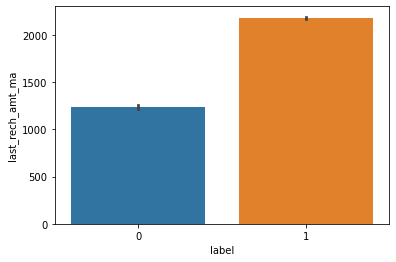

In [25]:
sns.barplot(x = 'label', y = 'last_rech_amt_ma', data = df)

Last recharge monthly amount we can see is for non defaulter are higher which means company considered thise customers anly 
who pays on time and providing the service accordingly.Though in last recharge date we seen that lot many users applied but byh considering this 
insight we can say that company is not providing services to those who are being considered as defaulter. Still there are half of the customefrs who opt this facility and later on become defaulter without payment

<AxesSubplot:xlabel='label', ylabel='cnt_ma_rech30'>

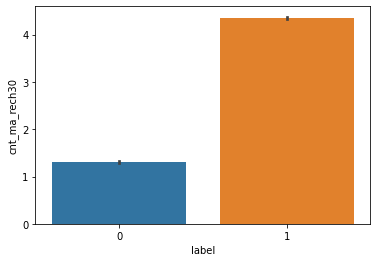

In [26]:
sns.barplot(x = 'label', y = 'cnt_ma_rech30', data = df)

As we know that how good credit we will have in market will get the return accordingly which we can see here that companies are giving recharge facilities to those more number of times
who are under non defaulter list. 

<AxesSubplot:xlabel='label', ylabel='fr_ma_rech30'>

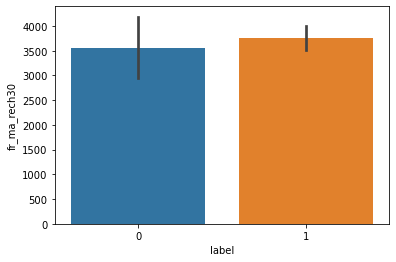

In [27]:
sns.barplot(x = 'label', y = 'fr_ma_rech30', data = df)

frequency for main account recharge in last 30 days we can see that both for payee and non payee are same. Here telecom industry has to keep in mind 
that they should provide loan facilities only to those who are taking loan and repay timely else they have to ber loss. here with these insight will able to know 
how to move further and whom to provide loan or not 

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech30'>

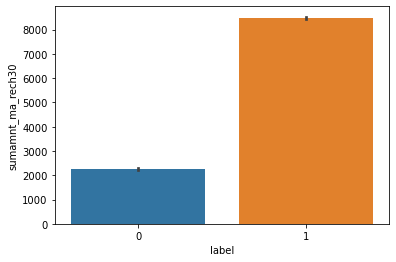

In [28]:
sns.barplot(x = 'label', y = 'sumamnt_ma_rech30', data = df)

for non payee we can see that total amount recharged in main account in last 30 days are almost within the range of 2000 while for payee it's 8000. 


<AxesSubplot:xlabel='label', ylabel='medianamnt_ma_rech30'>

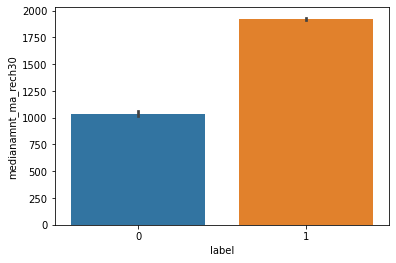

In [29]:
sns.barplot(x = 'label', y = 'medianamnt_ma_rech30', data = df)

amount used for main account recharge by users are more for those customers who are paying on time the loan amount provided by company

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal30'>

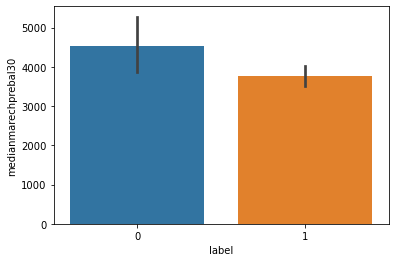

In [30]:
sns.barplot(x = 'label', y = 'medianmarechprebal30', data = df)

balance before recharge we can see are higher for defaulter user , this may be one of the reason that company after 
evaluating who are paying on time or not accordingly process the reachrge amount further. 

<AxesSubplot:xlabel='label', ylabel='cnt_ma_rech90'>

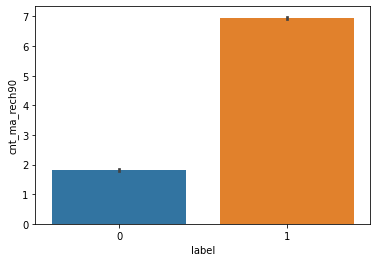

In [31]:
sns.barplot(x = 'label', y = 'cnt_ma_rech90', data = df)

No of times main account got recharged in 90 days for users who are paying timely are higher samewe seen in case of 30 days recharge too.

<AxesSubplot:xlabel='label', ylabel='fr_ma_rech90'>

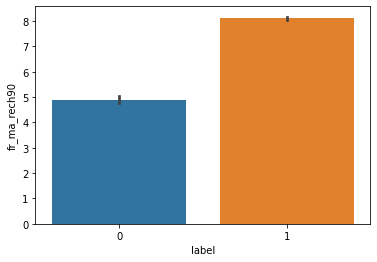

In [32]:
sns.barplot(x = 'label', y = 'fr_ma_rech90', data = df)

What we observed in case of frequency of recharge for main account for 30 days were almose same while in 90 days frequency for defaulter are less compare to non defaulter

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech90'>

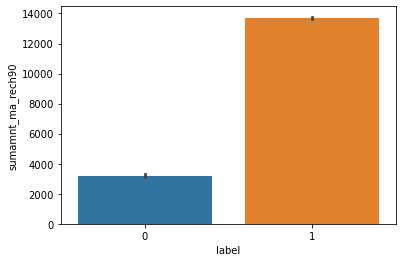

In [33]:
sns.barplot(x = 'label', y = 'sumamnt_ma_rech90', data = df)

In 30 days period too we notices that for defaulter it was within the range of 2000 and in 90 days too only little hike are there which is withi the range of 2000 - 4000 and for non defaulter it's almost 14000 in case of 90 days totl amount recharged and in 30 days span period 8000 amount was recharged 

<AxesSubplot:xlabel='label', ylabel='medianamnt_ma_rech90'>

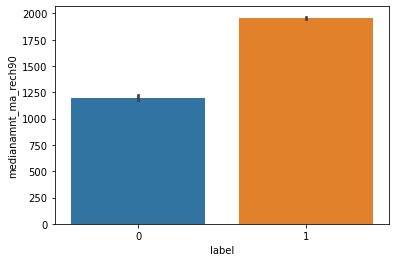

In [34]:
sns.barplot(x = 'label', y = 'medianamnt_ma_rech90', data = df)

Users who are paying on time are doing more recharge which we already noticed in 30 days too but the difference two were less
in 30 days while in 90 days the difference between two are almost double means non defaulter are double compare to defaulter who 
recharge there account for 90 days

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal90'>

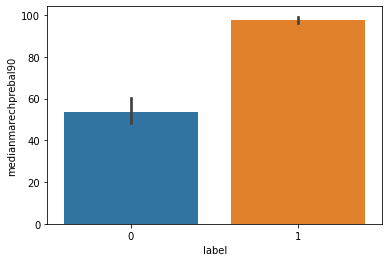

In [35]:
sns.barplot(x = 'label', y = 'medianmarechprebal90', data = df)

balance in account before recharge for 90 days are less for defaulter. Here we can consider that above in 30 days we seen that
defaulter were having high balance before recharge but here vice versa one reason may be that company by gathering the information 
who are payig loan on time and who doesnt accordingly they process the same. So once got the data of 30 days they processed amount 
of recharge for 90 days mostly for those who are paying on time.

<AxesSubplot:xlabel='label', ylabel='cnt_da_rech30'>

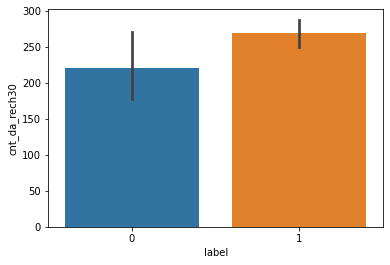

In [36]:
sns.barplot(x = 'label', y = 'cnt_da_rech30', data = df)

no of times data account get recharged for 30 days were more compare to 90 days. By observing once ho many are paying on time
company processing for those who are non defaulter in case of 90 days which in result we can see that 30 days are having more users who are 
defaulter comapre to 90 days where defaulter were less

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

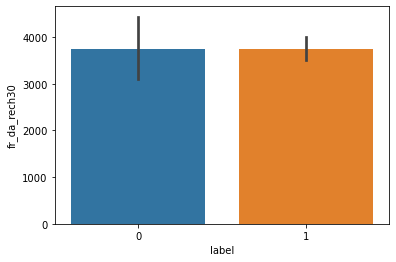

In [37]:
sns.barplot(x = 'label', y = 'fr_da_rech30', data = df)

frequency wise for 30 days almost both defaulter and non defaulter customer are same while for 90 days we seen that defaulter customer 
customer frequency are less compare to non defaulter

<AxesSubplot:xlabel='label', ylabel='cnt_da_rech90'>

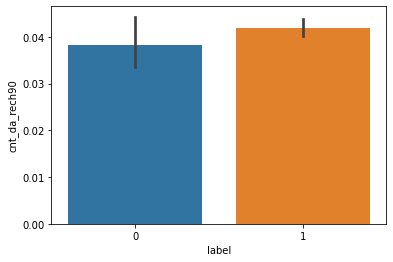

In [38]:
sns.barplot(x = 'label', y = 'cnt_da_rech90', data = df)

in last 90 days data recharge for non defaulter are more compare to defaulter account holder. in 30 days too we observed the same frequency 

<AxesSubplot:xlabel='label', ylabel='fr_da_rech90'>

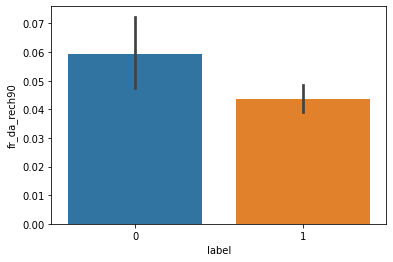

In [39]:
sns.barplot(x = 'label', y = 'fr_da_rech90', data = df)

frequency of data account recharge for 90 days we can see that defaulter are more compare to no defaulter while in 30 days both were almost on the same label

<AxesSubplot:xlabel='label', ylabel='cnt_loans30'>

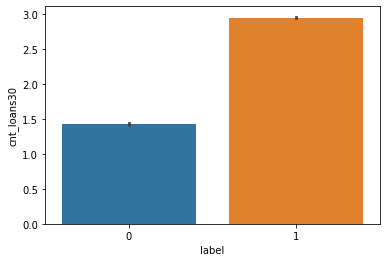

In [40]:
sns.barplot(x = 'label', y = 'cnt_loans30', data = df)

Here number of loans taken by user more are for non defaulter which is obvious. Companies are filtering those customers who 
are paying on time and providing credit to those for more number of times

<AxesSubplot:xlabel='label', ylabel='amnt_loans30'>

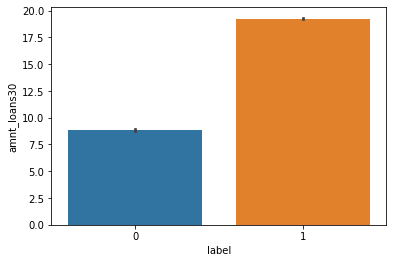

In [41]:
sns.barplot(x = 'label', y = 'amnt_loans30', data = df)

more number of times loan being provided to customers who are non defaulter even more amount of loan being provided to them only.

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans30'>

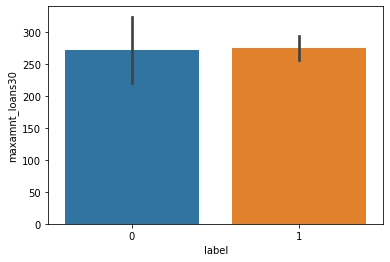

In [42]:
sns.barplot(x = 'label', y = 'maxamnt_loans30', data = df)

maximum amount of loan taken within 30 days are same for both payee and non payee customers. which means both type of customers applied for loan within the 30 days of time period

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans30'>

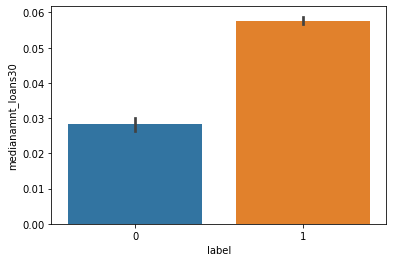

In [43]:
sns.barplot(x = 'label', y = 'medianamnt_loans30', data = df)

Median of amount loan within 30 days given more to non defaulter customer.

<AxesSubplot:xlabel='label', ylabel='cnt_loans90'>

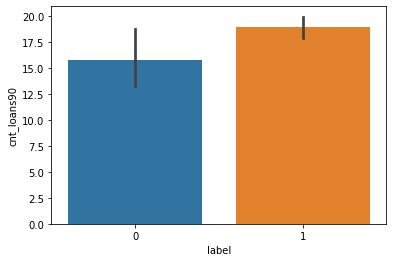

In [44]:
sns.barplot(x = 'label', y = 'cnt_loans90', data = df)

Number of loans taken by user in last 90 days for non defaulter are more. Where we can assume that company came across 
30 days report and released loan only to those who are paying on time.

<AxesSubplot:xlabel='label', ylabel='amnt_loans90'>

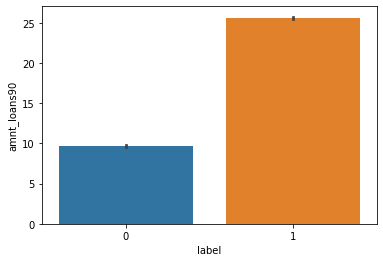

In [45]:
sns.barplot(x = 'label', y = 'amnt_loans90', data = df)

total amount of loan taken by user in 90 days are more for payee customer who are paying on time while for defaulter we can see
not even 30% of customer taken the loan or we can assume that company by noticing in first 30 days by giving loan whether th customer 
are paying on ime or not then issuing for those who are paying on time

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans90'>

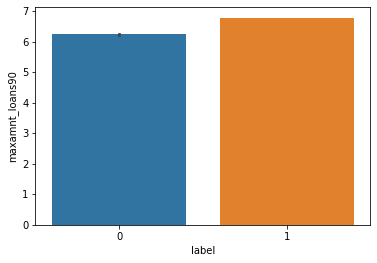

In [46]:
sns.barplot(x = 'label', y = 'maxamnt_loans90', data = df)

in last 90 days maximum amount of loan been taken by non defaulter but there is not much difference between defaulter and no defaulter for 
taking maximum loan in last 90 days

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans90'>

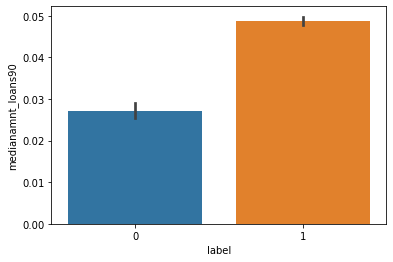

In [47]:
sns.barplot(x = 'label', y = 'medianamnt_loans90', data = df)

Median of amount loan within 90 days given more to non defaulter customer same as 30 days.

<AxesSubplot:xlabel='label', ylabel='payback30'>

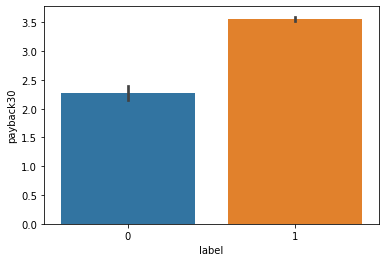

In [48]:
sns.barplot(x = 'label', y = 'payback30', data = df)

within 30 days we can see that pay back been done more by non defaulter which is obvious. So company extended the time period to 90 days .
let's have a look on the same 

<AxesSubplot:xlabel='label', ylabel='payback90'>

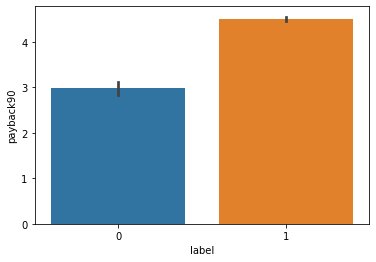

In [49]:
sns.barplot(x = 'label', y = 'payback90', data = df)

Here again as above we seen in 30 days same in 90 days defaulter payee are not paying even after extending the time period.

In [50]:
df.groupby('label')['cnt_ma_rech30','cnt_ma_rech90'].mean()

cnt_ma_rech30  cnt_ma_rech90
label                              
0           1.303417       1.812744
1           4.359530       6.957630

number of time main account got recharge for 30 and 90 days both are more in case of non defaulter customers . While defaulter are very less who are 
doing recharge for more number of times

In [51]:
df.groupby('label')['fr_ma_rech30','fr_ma_rech90'].mean()

fr_ma_rech30  fr_ma_rech90
label                            
0       3548.410637      4.903601
1       3764.303486      8.118012

frequency means how frequent customer do recharge. Here frequency for main account recharge for both 30 and 90 days are more for non defaulter.
But in case of 30 days frequency are very less between payee and non payee while in case of 90 days difference are almost double, which we can assume
that after getting the report of 30 days who are paying on time and who doesn't accordingly company process the loan amount in case of 90 days

In [52]:
df.groupby('label')['sumamnt_ma_rech30','sumamnt_ma_rech90'].mean()

sumamnt_ma_rech30  sumamnt_ma_rech90
label                                      
0            2258.849629        3210.102783
1            8481.191767       13706.395778

total amount of recharge in main account on an average we can see that for defaulter there are only 2258 approx for 30 days time period and for 9 days time period
it's almost 3210 while for non defaulter it's almost 8481 for 30 days which almost more than 73% compare to defaulter and for 90 days it's 13706 which is also more than 76% 


In [53]:
df.groupby('label')['medianamnt_ma_rech30','medianamnt_ma_rech90'].mean()

medianamnt_ma_rech30  medianamnt_ma_rech90
label                                            
0               1036.967185           1198.435135
1               1923.474317           1959.607547

Median of amount recharge done in 30 and 90 days on an average we can see that for non defaulter it's higher while defaulter
too having such recharge half of non defaulter. 

In [54]:
df.groupby('label')['medianmarechprebal30','medianmarechprebal90'].mean()

medianmarechprebal30  medianmarechprebal90
label                                            
0               4542.476553             53.604368
1               3753.437868             97.505394

main account balance just before recharge we can see for 30 days more balance is in defaulter account compare to non defaulter while
in 90 days it's opposite means non payee do have less balance before recharge compare to payee

In [55]:
df.groupby('label')['cnt_da_rech30','cnt_da_rech90'].mean()

cnt_da_rech30  cnt_da_rech90
label                              
0         220.177745       0.038338
1         268.625497       0.041945

Data recharge for non defaulter are more for 30 and 90 days recharge. But in 90 days recharge are less we can assume here that
mostly recharge for data being done for 30 days rather than 90 days

In [56]:
df.groupby('label')['fr_da_rech30','fr_da_rech90'].mean()

fr_da_rech30  fr_da_rech90
label                            
0       3753.278511      0.059361
1       3748.954741      0.043766

frequency we can observe for 30 days are more rather than 90 days for data recharge either it's defaulter or non defaulter customer.
Above also observed that recharge usually maximum done for 30 days rather than 90 days specially for data recharge

In [57]:
df.groupby('label')['cnt_loans30','cnt_loans90'].mean()

cnt_loans30  cnt_loans90
label                          
0         1.431313    15.703549
1         2.948340    18.922749

loans taken by user in 30 days are higher for non defaulter customer comapre to defaulter while for 90 days too non defaulter are higher but difference between two are less 

In [58]:
df.groupby('label')['amnt_loans30','amnt_loans90'].mean()

amnt_loans30  amnt_loans90
label                            
0          8.873634      9.642382
1         19.246834     25.642590

Total amount loan applied more by payee customer both for 30 and 90 days 

In [59]:
df.groupby('label')['maxamnt_loans30','maxamnt_loans90'].mean()

maxamnt_loans30  maxamnt_loans90
label                                  
0           271.873754         6.234386
1           275.055959         6.769990

There are not much difference between defaulter and non defaulter in case of taking maximum loan either for 30 days or 90 days.
But for 90 days amount applied are less compare to 30 days

In [60]:
df.groupby('label')['medianamnt_loans30','medianamnt_loans90'].mean()

medianamnt_loans30  medianamnt_loans90
label                                        
0                0.028285            0.027081
1                0.057700            0.048787

in this case we can see that loan applied are less as mean average is almost 0.02 in both the cases either it's 30 days or 90 days

<AxesSubplot:xlabel='label', ylabel='count'>

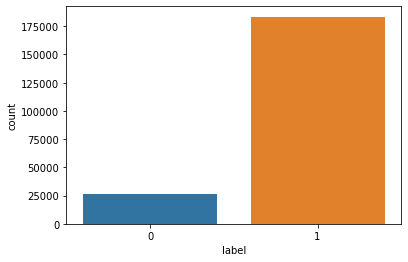

In [101]:
sns.countplot('label',data = df)

Clearly we can see that using countplot data is imbalanced as defaulter are very less compare to non defaulter.

## Data Cleaning

In [61]:
# Dropping the columns as not required 
df.drop(columns=['Unnamed: 0','msisdn','pcircle'],inplace=True)

## Feature Engineering

In [62]:
le = LabelEncoder()
df1 = le.fit_transform(df['pdate'])
df['pdate']=df1

## Checking skewness 

In [63]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [64]:
skew = ['rental90','last_rech_amt_ma','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','sumamnt_ma_rech90',
       'medianamnt_ma_rech90','payback30','payback90']
       

In [65]:
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [66]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                -1.232975
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma        -2.190580
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30       -1.762898
medianamnt_ma_rech30    -1.867802
medianmarechprebal30     0.287245
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90       -2.023724
medianamnt_ma_rech90    -2.235333
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

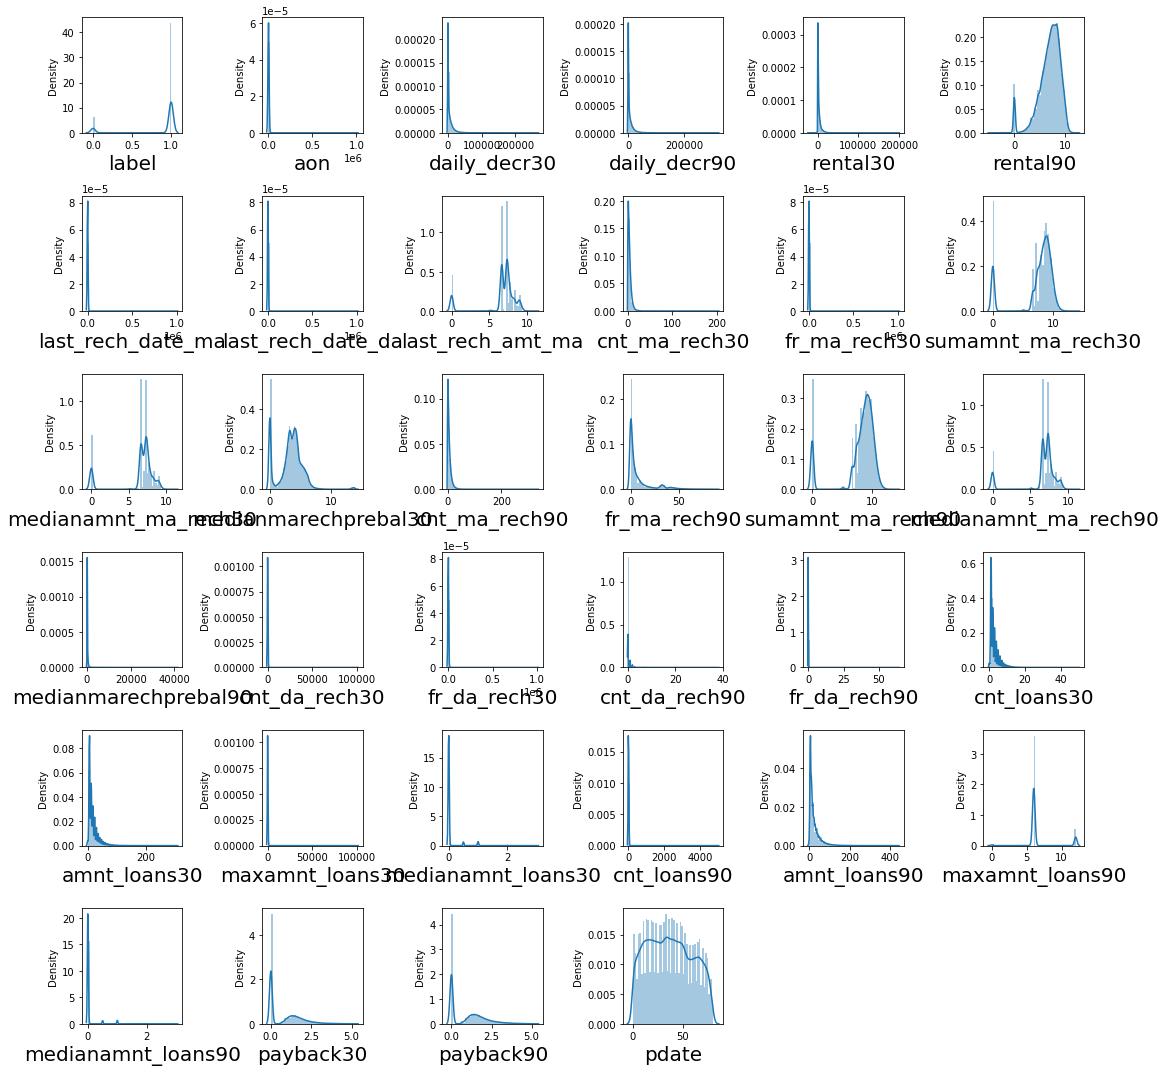

In [67]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=36:
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

removed skewness using log1p method to normalize the data points for contnious columns

# Checking the correlation among features if any using code and heatmap

In [68]:
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.201757 -0.002669      0.441526      0.435908   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.318674  0.002045      0.243882      0.234398   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.366286 -0.000058      0.342719      0.326410   
medianamnt_ma_rech30  0.325186  0.001099      0.254493      0.242991   
medianmarechprebal30  0.267614  0.000568      0.187958      0.180240   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.377523  0.001015      0.382064      0.373780   
medianamnt_ma_rech90  0.313838  0.002083      0.238523      0.230176   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.193376  0.000176      0.168254      0.157631   
payback90             0.202943  0.001681      0.200696      0.192642   
pdate                 0.162687 -0.001650      0.534191      0.545599   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.201757           0.003728   
aon                  -0.000960 -0.002669           0.001692   
daily_decr30          0.442066  0.441526           0.000487   
daily_decr90          0.434685  0.435908           0.000908   
rental30              1.000000  0.612890          -0.001095   
rental90              0.612890  1.000000           0.000111   
last_rech_date_ma    -0.001095  0.000111           1.000000   
last_rech_date_da     0.003261  0.002043           0.001790   
last_rech_amt_ma      0.150650  0.421598          -0.000196   
cnt_ma_rech30         0.233343  0.367671           0.004311   
fr_ma_rech30         -0.001219  0.000539          -0.001629   
sumamnt_ma_rech30     0.198866  0.493139          -0.000230   
medianamnt_ma_rech30  0.151631  0.430800          -0.001480   
medianmarechprebal30  0.091195  0.285718           0.002170   
cnt_ma_rech90         0.312118  0.430425           0.004263   
fr_ma_rech90         -0.033530  0.033697           0.001414   
sumamnt_ma_rech90     0.230206  0.529311           0.000512   
medianamnt_ma_rech90  0.148362  0.420181          -0.000582   
medianmarechprebal90  0.027170  0.030526          -0.001086   
cnt_da_rech30        -0.001105 -0.000849          -0.003467   
fr_da_rech30         -0.002558 -0.001838          -0.003626   
cnt_da_rech90         0.072255  0.058263          -0.003538   
fr_da_rech90          0.046761  0.041362          -0.00

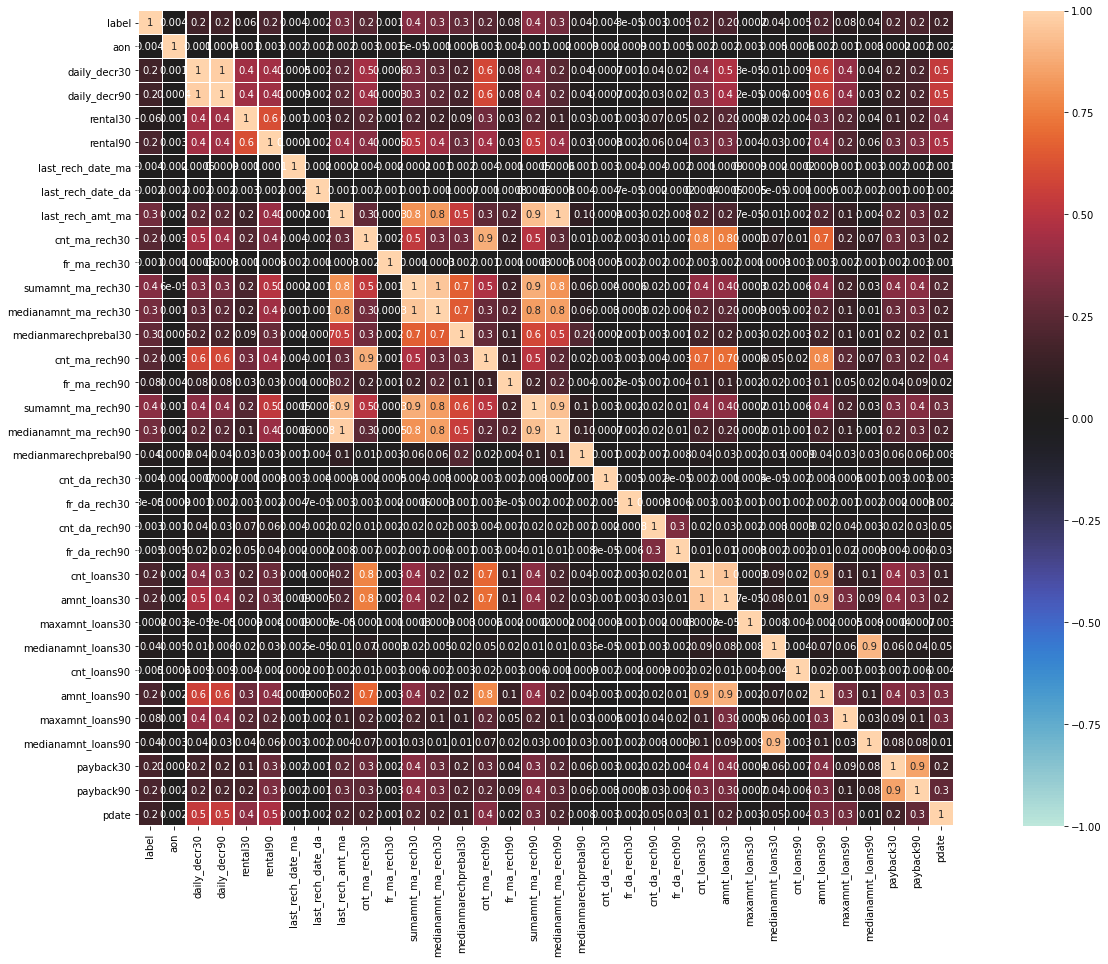

In [69]:
# Checking correlation with the help of heatmap
df_corr = df.corr().abs()

plt.figure(figsize = (25,15))
sns.heatmap(df_corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


In [70]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [71]:
imbalance_per= 26162/183431*100
imbalance_per

14.26258375083819

In [72]:
df.drop(columns=['rental90','medianmarechprebal30'],inplace=True)

In [73]:
df.isna().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

In [74]:
df.isna().any().any()

False

Defaulter customers are only 14% which we need to balance either by oversampling or undersampling. Here i will do oversampling
using smote as data loss will lead machine algorithm not to perform well

In [75]:
## Splitting target and feature variable into x and y
x = df.drop(columns=['label'])
y= df['label']

In [76]:
x.shape

(209593, 31)

In [77]:
y.shape

(209593,)

In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

As ur data is imbalanced so need to balance the same and here we used oversampling because in under sampling will loose 
lot many data which will affect our model

In [79]:
x1,y1 = sm.fit_resample(x,y)

In [80]:
y1.value_counts()

1    183431
0    183431
Name: label, dtype: int64

## Scaling all features

In [81]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x1)
x_scaler

array([[-0.10629842, -0.07355464, -0.10734352, ...,  2.97413815,
         2.62735923,  0.80240825],
       [-0.10065757,  1.12977139,  0.91927638, ..., -0.66894235,
        -0.72537984,  1.86263782],
       [-0.10292673, -0.29347108, -0.29626239, ..., -0.66894235,
        -0.72537984,  2.31702193],
       ...,
       [-0.09510691, -0.47900754, -0.45468159, ..., -0.66894235,
        -0.72537984,  0.14607565],
       [-0.10364348, -0.47900754, -0.45468159, ..., -0.66894235,
        -0.72537984, -0.76269255],
       [-0.09499805, -0.41264973, -0.39802236, ..., -0.66894235,
        -0.72537984,  0.19656278]])

# Prediction using machine algorithm 

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

In [83]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_scaler,y1,random_state=42,test_size=0.30)

In [84]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [85]:
DTC = DecisionTreeClassifier()
DTC.fit(x1_train,y1_train)
pred = DTC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     55041
           1       0.92      0.91      0.92     55018

    accuracy                           0.92    110059
   macro avg       0.92      0.92      0.92    110059
weighted avg       0.92      0.92      0.92    110059



In [86]:
print(cross_val_score(DTC,x1,y1,cv=5).mean())

0.909971838675397


In [87]:
RFC = RandomForestClassifier()
RFC.fit(x1_train,y1_train)
pred =RFC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     55041
           1       0.94      0.96      0.95     55018

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059



In [88]:
print(cross_val_score(RFC,x1,y1,cv=5).mean())

0.9379906038256183


In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lr = LogisticRegression()
lr.fit(x1_train,y1_train)
pred =lr.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     55041
           1       0.84      0.76      0.80     55018

    accuracy                           0.81    110059
   macro avg       0.81      0.81      0.81    110059
weighted avg       0.81      0.81      0.81    110059



In [91]:
print(cross_val_score(lr,x1,y1,cv=5).mean())

0.6601637693599879


In [92]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x1_train,y1_train)
pred = gbdt_clf.predict(x1_train)
gbdt_clf_report = classification_report(y1_train,pred)
print(gbdt_clf_report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92    128390
           1       0.92      0.92      0.92    128413

    accuracy                           0.92    256803
   macro avg       0.92      0.92      0.92    256803
weighted avg       0.92      0.92      0.92    256803



## Plotting AUC ROC Curve 

In [93]:
from sklearn.metrics import plot_roc_curve

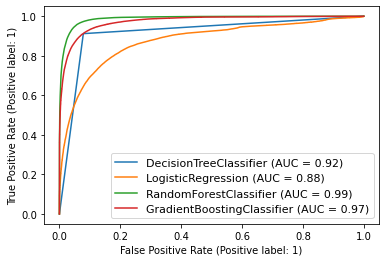

In [94]:
disp = plot_roc_curve(DTC,x1_test,y1_test)

plot_roc_curve(lr,x1_test,y1_test,ax = disp.ax_) # ax = axes with confusion mtrix

plot_roc_curve(RFC,x1_test,y1_test,ax = disp.ax_)

plot_roc_curve(gbdt_clf,x1_test,y1_test,ax = disp.ax_)

plt.legend(prop={'size':11}, loc = 'lower right')

plt.show()

Above in diagram we can see that Random Forest classifier which is showing less false positive rate and highest true positive 
rate compare to other models , So here our best performing model is Random Forest classifier on which will do hyper parameter tuning 
to get more better score

## Hyperparameter Tuning

In [95]:
# RandomForestClassifier
param = {'n_estimators':[100,500],
        'criterion':['gini','entropy'],
        'max_depth':[10,20,30],
        'max_features':['auto','sqrt','log2']}

In [96]:
GC = GridSearchCV(RFC,param,cv=5)

In [97]:
GC.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500]})

In [98]:
GC.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 500}

In [99]:
final_rfc = RandomForestClassifier(criterion = 'gini',max_depth = 30, max_features = 'auto',n_estimators = 500)
final_rfc.fit(x1_train,y1_train)
pred = final_rfc.predict(x1_test)
acc = accuracy_score(pred,y1_test)
print(acc*100)

95.0135836233293


In [100]:
import joblib
joblib.dump(final_rfc,'Finalmodelmicro credit.pk1')

['Finalmodelmicro credit.pk1']

## Predicting model on test data

In [102]:
# prediction using the same model
loaded_model = joblib.load(open('Finalmodelmicro credit.pk1', 'rb'))

In [103]:
prediction=loaded_model.predict(x1_test)

In [104]:
prediction=pd.DataFrame(prediction) # Converting into Data frame

In [105]:
prediction

0
0       0
1       1
2       1
3       1
4       0
...    ..
110054  1
110055  1
110056  1
110057  1
110058  0

[110059 rows x 1 columns]